# Notes on the datasets

## - BJS Budget Dataset
#### - https://www.bjs.gov/index.cfm?ty=tp&tid=5
### - tables 7,8, and 9 (read the readme.txt) are interesting
## - BJS Arrest Dataset
#### - https://www.bjs.gov/index.cfm?ty=tp&tid=63#summary
### - Table 1, 2, 3, 5, 1515T08
## - https://state-local-finance-data.taxpolicycenter.org//pages.cfm

# Goal: Prosecution of crime relative to law enforcement spending
## Subgoals: Why the sudden decrease in arrests since 2010?, Will decreases/increases in funding affect the number of arrests?, What are other related factors that could have contributed to the decrease in arrests?

In [1]:
# importing packages and datasets
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('Arrest_data.xlsx')
data1 = pd.read_excel('pol_exp_dat.xlsx')
pds = pd.read_excel('Police_Deaths.xlsx')
pks = pd.read_excel('MPVDatasetDownload.xlsx')
pop = pd.read_excel('US_pop_data.xlsx')
levels = pd.read_excel('dir_exp_by_level.xlsx')

# Data cleaning and reformatting
data1 = data1.T  
data1 = data1.drop(data1.index[0])  
data1 = data1.rename(columns=data1.iloc[0])  
data1 = data1.drop(data1.index[0])  

pds = pds.drop(pds.index[0:5])

pop = pop.T
pop = pop.drop(pop.index[0:4])


# merging datasets
data1['Year(fiscal)'] = data1.index 
pop['Year(fiscal)'] = pop.index
pds = pds.rename(columns = {'year':'Year(fiscal)'})
pop = pop.rename(columns = {0:'US Population'})


full_data = pd.merge(data1, data)  
full_data = pd.merge(full_data, pds)
full_data = pd.merge(full_data, pop)

#full_data['US Population'] = full_data[0]


# uncomment below line to insepct dataset
full_data.head(100)


,(R01) Total Revenue,(E019) Police & Fire Protection-Dir Exp,(E087) Police Prot-Direct Exp,(E088) Police Prot-Cur Oper (E62),(E089) Police Prot-Cap Outlay,Year(fiscal),Arrested suspects,Suspects investigated,Defendants charged,Defendents convicted,Defendents sentenced to prison,police officers killed,Number of officers,"felonious killings of police officer per 100,000 officers",Unnamed: 4,US Population
0,1331492151,54767418,38644621,36998096,1646525,1994,80450,99251,62327,50701,33022,76,454105,16.74,NaN,263126000
1,1417924528,58064013,41054532,39111349,1943183,1995,82989,102220,63547,47556,31805,74,421414,17.56,70.0,266278000
2,1513633310,62391673,44682901,42272171,2410730,1996,84860,97776,65480,53076,36373,55,373575,14.72,NaN,269394000
3,1616495229,66712592,47389234,44973342,2415892,1997,91504,110034,69351,56570,39431,65,451980,14.38,NaN,272657000
4,1720889368,70744074,50475211,47889915,2585296,1998,103866,115692,78172,60958,43041,61,445898,13.68,NaN,275854000
5,1794121421,74628629,53366526,50670136,2696390,1999,109033,117994,80031,66055,47659,42,470145,8.93,NaN,279040000
6,1942328438,79900002,56798071,53990068,2808003,2000,115025,123559,83251,68156,50451,51,441311,11.56,54.8,282162411
7,1890891484,84554276,59584216,56934385,2649831,2001,116777,121818,82614,68533,51057,70,464515,15.07,NaN,284968955
8,1806591592,90456016,64458395,61474298,2984097,2002,121610,124335,87727,71798,53682,56,482762,11.60,NaN,287625193
9,2047337010,95215430,67361388,64532234,2829154,2003,124708,130078,92085,75805,57629,52,482985,10.77,NaN,290107933


Text(0, 0.5, 'Arrests')

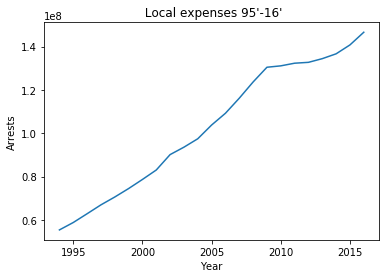

In [4]:
plt.plot(levels['Year(fiscal)'], levels['Local - Dir Exp'])
plt.title(' Local expenses 95\'-16\'')
plt.xlabel('Year')
plt.ylabel('Expenses')

Text(0, 0.5, 'Arrests')

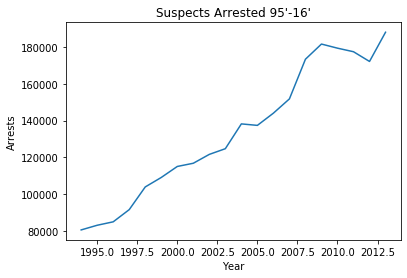

In [174]:
plt.plot(full_data['Year(fiscal)'], full_data['Arrested suspects'])
plt.title('Suspects Arrested+95\'-16\'')
plt.xlabel('Year')
plt.ylabel('Arrests')

Text(0, 0.5, 'USD (thousands)($)')

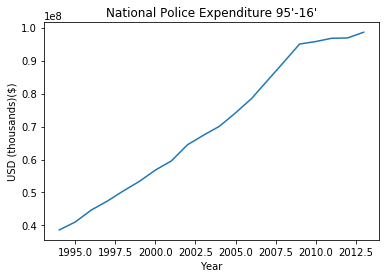

In [162]:
plt.plot(full_data['Year(fiscal)'], full_data['(E087) Police Prot-Direct Exp'])
plt.title('National Police Expenditure 95\'-16\'')
plt.xlabel('Year')
plt.ylabel('USD (thousands)($)')

Text(0, 0.5, 'killings')

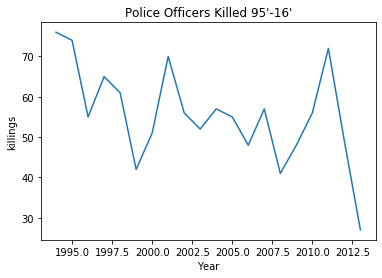

In [164]:
plt.plot(full_data['Year(fiscal)'], full_data['police officers killed'])
plt.title('Police Officers Killed 95\'-16\'')
plt.xlabel('Year')
plt.ylabel('killings')

Text(0, 0.5, 'Police Deaths')

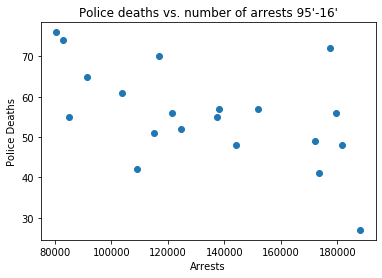

In [177]:
plt.scatter(full_data['Arrested suspects'], full_data['police officers killed'])
plt.title('Police deaths vs. number of arrests 95\'-16\'')
plt.xlabel('Arrests')
plt.ylabel('Police Deaths')

Text(0, 0.5, 'Police Deaths')

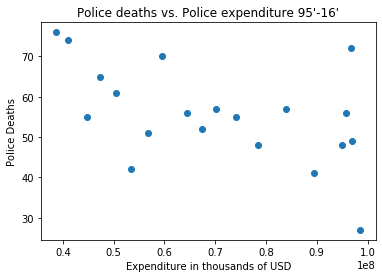

In [181]:
plt.scatter(full_data['(E087) Police Prot-Direct Exp'], full_data['police officers killed'])
plt.title('Police deaths vs. Police expenditure 95\'-16\'')
plt.xlabel('Expenditure in thousands of USD')
plt.ylabel('Police Deaths')

Text(0, 0.5, 'Number of Officers')

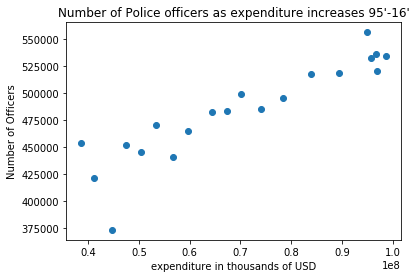

In [202]:
plt.scatter(full_data['(E087) Police Prot-Direct Exp'], full_data['Number of officers'])
plt.title('Number of Police officers as expenditure increases 95\'-16\'')
plt.xlabel('expenditure in thousands of USD')
plt.ylabel('Number of Officers')

##  Valuing quantity over quality

Text(0, 0.5, 'Arrested suspects')

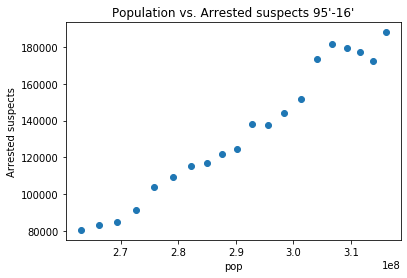

In [206]:
plt.scatter(full_data['US Population'], full_data['Arrested suspects'])
plt.title('Population vs. Arrested suspects 95\'-16\'')
plt.xlabel('pop')
plt.ylabel('Arrested suspects')